In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# -' 깨짐 해결'
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns
from scipy import stats
# 한글 깨짐 해결
plt.rc('font', family='Malgun Gothic')

In [2]:
# 데이터 불러오기
df = pd.read_excel("교육통계데이터_2015_2020_raw_data.xlsx")

In [3]:
df2 = pd.read_excel('교육통계데이터_합칠꺼.xlsx') # 2022~2021년 데이터

In [14]:
# 2021-2022년 데이터와 2015-2020년 데이터 합치기

In [4]:
df2 = pd.concat([df, df2], axis=0)

In [5]:
# 고등학교만 마스킹
df3 = df[[i in ['고등학교']
          for i in df['학제']]]

In [6]:
# 학업중단자 비율 칼럼 생성
df3['학업중단자_비율'] = df3['학업중단자_계'] / df3['학생수_계'] * 100

C:\Users\leah5\AppData\Local\Temp\ipykernel_19648\3043790330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['학업중단자_비율'] = df3['학업중단자_계'] / df3['학생수_계'] * 100


In [7]:
# 교사수 비율 칼럼 생성
df3['교사수_비율'] = df3['교원수_정규_상담_계'] / df3['교원수_정규_계'] * 100

C:\Users\leah5\AppData\Local\Temp\ipykernel_19648\3895217755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['교사수_비율'] = df3['교원수_정규_상담_계'] / df3['교원수_정규_계'] * 100


In [9]:
df3.to_excel("교육통계데이터_2015_2022_최종.xlsx", index=None)

In [29]:
df3

,연도,시도,행정구역,학제,학교수,학생수_계,교원수_정규_계,교원수_정규_상담_계,학업중단자_계,학업중단자_비율,교사수_비율
3,2015,서울,종로구,고등학교,15,12653,840,8,179,1.414684,0.952381
14,2015,서울,중구,고등학교,12,8933,637,5,97,1.085861,0.784929
24,2015,서울,용산구,고등학교,10,7580,538,6,100,1.319261,1.115242
32,2015,서울,성동구,고등학교,7,6428,467,3,118,1.835719,0.642398
40,2015,서울,광진구,고등학교,9,10936,586,2,168,1.536211,0.341297
...,...,...,...,...,...,...,...,...,...,...,...
4010,2022,경남,함양군,고등학교,4,744,98,1,12,1.612903,1.020408
4017,2022,경남,거창군,고등학교,7,2026,167,3,28,1.382034,1.796407
4026,2022,경남,합천군,고등학교,6,602,102,1,12,1.993355,0.980392
4033,2022,제주,제주시,고등학교,20,13999,1012,12,115,0.821487,1.185771


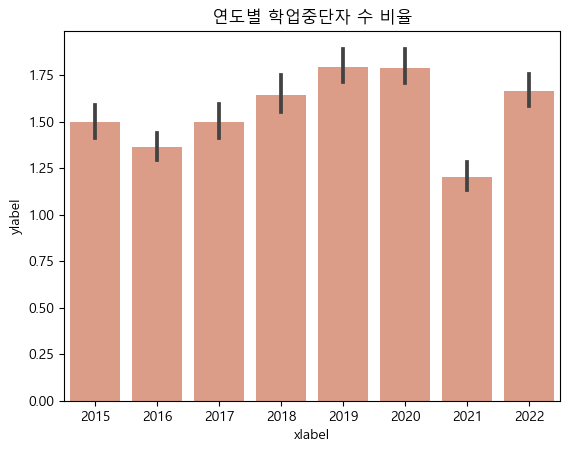

In [30]:
# 연도별 학업중단자 수 알아보기
sns.barplot(data=df3, x='연도', y='학업중단자_비율', color='#E9967A')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('연도별 학업중단자 수 비율')
plt.show()

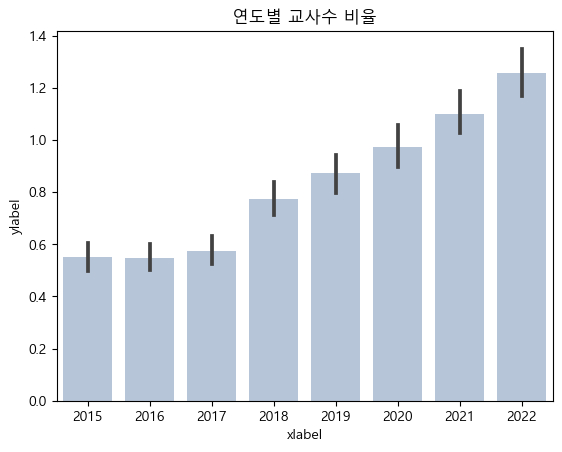

In [31]:
# 연도별 교사수 알아보기
sns.barplot(data=df3, x='연도', y='교사수_비율', color='#B0C4DE')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('연도별 교사수 비율')
plt.show()

In [32]:
#  포식자 피식자 그래프 해석: 가설의 인과관계가 뒤바뀌었음을 알 수 있음.
# 즉, 학업중단자의 비율이 많을 수록 상담 교사수의 비율도 늘어난다;

<Axes: xlabel='연도', ylabel='학업중단자_비율'>

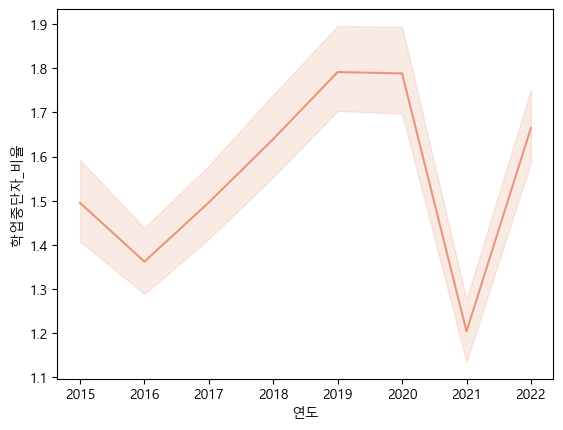

In [33]:
sns.lineplot(data=df3, x='연도', y='학업중단자_비율',color='#E9967A')

<Axes: xlabel='연도', ylabel='교사수_비율'>

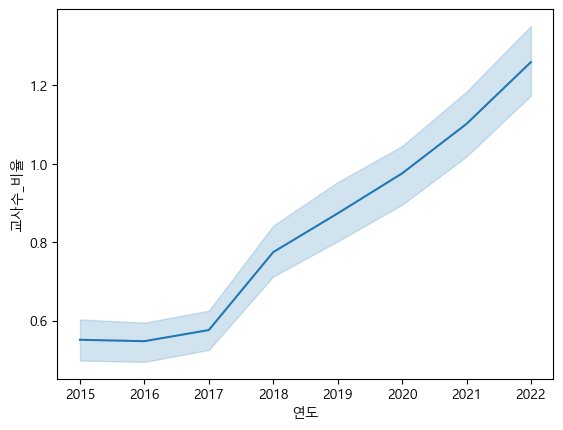

In [34]:
sns.lineplot(data=df3, x='연도', y='교사수_비율')